In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_losses_200 = [3.105141,2.761510,2.630696,2.430609,2.352525,1.880582,1.841365,1.836383,1.783035,1.670488,1.678416,1.569499,1.527686,1.519392,1.388473,1.399740,1.354473,1.323712,1.277311,1.177971,1.170276,1.151288,1.157347,1.083001,0.972499,0.9837061,1.042210,0.973433,0.961035,0.946487]
val_loss_200 = [2.105704,2.124803,2.104877,2.224254,1.927955,1.623616,1.1565620,1.617148,1.650591,1.645077,1.567693,1.514349,1.568383,1.840113,1.521973,1.488191,1.391418,1.536419,1.465897,1.528275,1.443328,1.557700,1.660132,1.470758,1.534209,1.536631,1.523839,1.573179,1.506759,1.492032]
accuracies_200 = [0.293750,0.368750,0.393750,0.381250,0.434375,0.468750,0.5,0.515625,0.496875,0.453125,0.503125,0.515625,0.503125,0.45625,0.5375,0.5625,0.5875,0.55,0.578125,0.58125,0.6125,0.571875,0.528125,0.60625,0.565625,0.590625,0.590625,0.575,0.59375,0.609375]
print(len(train_losses_200))
print(len(val_loss_200)) 
print(len(accuracies_200))

30
30
30


In [8]:
df_res = pd.read_csv("results.csv")
df_res.head()

,epoch,train_loss,valid_loss,accuracy
0,1,3.204,2.454,0.260
1,2,2.579,1.998,0.383
2,3,2.246,1.843,0.438
3,4,1.996,1.688,0.475
4,5,1.781,1.603,0.498


In [9]:
epochs = df_res["epoch"]
train_losses = df_res["train_loss"]
val_losses = df_res["valid_loss"]
accuracies = df_res["accuracy"]

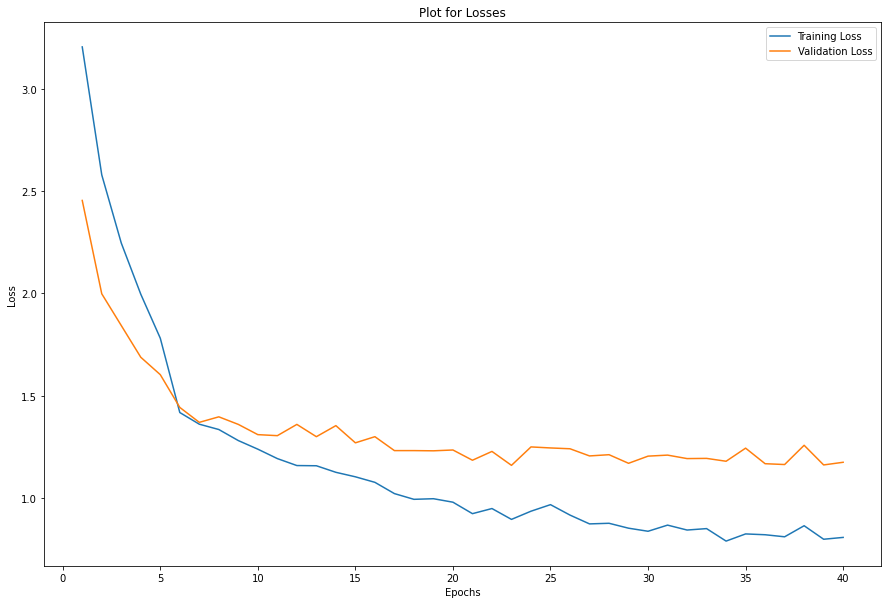

In [12]:
plt.figure(figsize=(15,10))
plt.title("Plot for Losses")
plt.plot(epochs,train_losses,label='Training Loss')
plt.plot(epochs,val_losses,label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

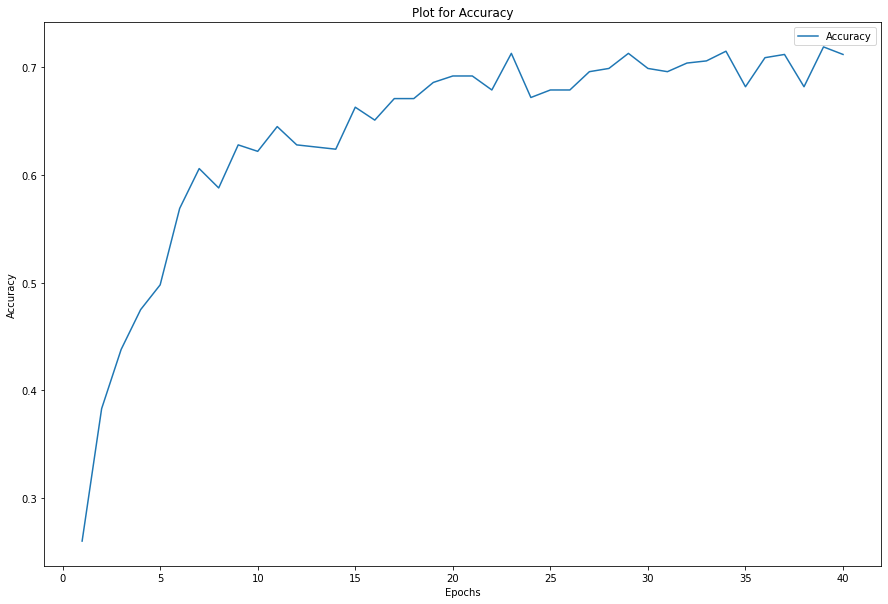

In [13]:
plt.figure(figsize=(15,10))
plt.title("Plot for Accuracy")
plt.plot(epochs,accuracies,label='Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

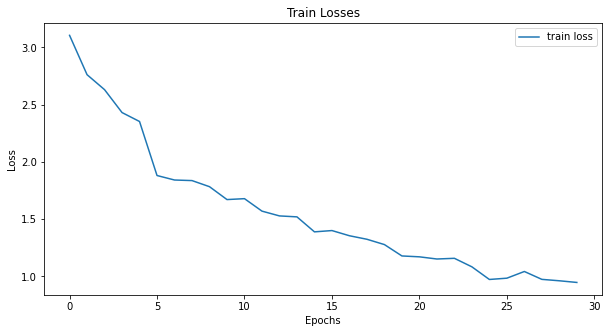

In [5]:
#Plot the train_losses_200 with epochs mention fig size
plt.figure(figsize=(10,5))
plt.title("Train Losses")
plt.plot(train_losses_200,label='train loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
train = pd.read_csv("D:/Programming/Ai hackathon/dataset.csv")
train.head()

,image_id,label
0,Actinic keratosis/ISIC_0067698_rot.jpg,0
1,Actinic keratosis/ISIC_0061774.jpg,0
2,Actinic keratosis/ISIC_0069043.jpg,0
3,Actinic keratosis/ISIC_0059561.jpg,0
4,Actinic keratosis/ISIC_0064617.jpg,0


In [18]:
train.shape

(9095, 2)

In [19]:
train['image_id'] = "D:/Programming/Ai hackathon/image_dataset_team_machine_minds/" + train['image_id'] 
train.head()

,image_id,label
0,D:/Programming/Ai hackathon/image_dataset_team_machine_minds/Actinic keratosis/ISIC_0067698_rot.jpg,0
1,D:/Programming/Ai hackathon/image_dataset_team_machine_minds/Actinic keratosis/ISIC_0061774.jpg,0
2,D:/Programming/Ai hackathon/image_dataset_team_machine_minds/Actinic keratosis/ISIC_0069043.jpg,0
3,D:/Programming/Ai hackathon/image_dataset_team_machine_minds/Actinic keratosis/ISIC_0059561.jpg,0
4,D:/Programming/Ai hackathon/image_dataset_team_machine_minds/Actinic keratosis/ISIC_0064617.jpg,0


In [20]:
def get_x(row): return row['image_id']
def get_y(row): return row['label']

db = DataBlock(blocks = (ImageBlock, CategoryBlock),
              get_x = get_x,
               get_y = get_y,
               splitter = RandomSplitter(valid_pct = 0.2),
               item_tfms = [Resize(128)],
               batch_tfms = [RandomResizedCropGPU(224), *aug_transforms(), 
                            Normalize.from_stats(*imagenet_stats)]            
              )

In [21]:
dls = db.dataloaders(train, bs = 8)

In [24]:
learn = vision_learner(dls, resnet152, opt_func=ranger, loss_func=LabelSmoothingCrossEntropy(), metrics=['accuracy','precision','recall','F1Score'])

d:\Programming\Python\.aivenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\Programming\Python\.aivenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to C:\Users\dell/.cache\torch\hub\checkpoints\resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [6]:
from fastai.vision.all import * 

In [30]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 301D-D0F4

 Directory of d:\Programming\Ai hackathon\Skin_Cancer_Detection

01/27/2023  11:57 AM    <DIR>          .
01/27/2023  11:34 AM    <DIR>          ..
01/26/2023  10:45 PM            10,646 comment.json
01/27/2023  11:57 AM    <DIR>          models
01/26/2023  10:47 PM             1,348 README.md
01/25/2023  06:01 AM       241,530,880 resnet152.pth
01/27/2023  11:38 AM           390,211 resnet152-with-fastai_2.ipynb
01/27/2023  11:58 AM            38,662 visualization.ipynb
01/27/2023  11:08 AM               925 webui.py
               6 File(s)    241,972,672 bytes
               3 Dir(s)  59,180,085,248 bytes free


In [25]:
learn = load_learner('resnet152.pth', cpu=True)

AttributeError: 'collections.OrderedDict' object has no attribute 'dls'

In [ ]:
import cv2
import numpy as np 
import os 

def processImage(img):
    kernel = np.ones((3,3),np.uint8)
    # grayscale conversion
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #eroison
    # img = cv2.erode(img,kernel,iterations=1)

    # applying Otsu thresholding
    # as an extra flag in binary 
    # thresholding
    # params: source, threshold value, max value, thresholding technique  
    ret, thresh1 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)
    # median blur
    img = cv2.medianBlur(thresh1, 3)
    # resizing 
    # for lenet (32,32)
    # for alexnet (128,128)
    img = cv2.resize(img, (32,32))

    return img 